In [5]:
from __future__ import division
from ADMCode import visualize as vis
from ADMCode import ddm, sdt

import numpy as np
import pandas as pd
import numba as nb
from numba.decorators import jit
from numba import float64, int64, vectorize, boolean

from ipywidgets import interactive
from IPython.display import display, Latex
%matplotlib inline

# from safaribook import safariplot as splot
# splot.style('safari-day')
sns.set(style='white', font_scale=1.3)

## Signal Detection Theory

In [6]:
interactive_plot = interactive(vis.sdt_interact, Hits=(0,100,5), Misses=(0,100,5), CR=(0,100,5), FA=(0,100,5))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=100, description='Hits', step=5), IntSlider(value=100, description='Misses', step=5), IntSlider(value=100, description='CR', step=5), IntSlider(value=0, description='FA', step=5), Output(layout=Layout(height='300px'))), _dom_classes=('widget-interact',))

## DDM Parameters

In [7]:
a = .10 # boundary height
v = .14 # strong drift-rate
tr = .25 # nondecision time (in seconds)
z = .5 # starting point ([0,1], fraction of a)

dt = .001 # time stepsize
si = .1 # sigma (noise scalar)
dx = si * np.sqrt(dt) # evidence stepsize (up/down)
deadline = 1.75 # max decision time (in sec)
ntrials = 1000 # number of trials to simulate

parameters = np.array([a, tr, v, z, si, dx, dt])

## Simulate DDM

In [97]:
df, traces = ddm.sim_ddm_trials(parameters, ntrials, deadline)
df.head()

,trial,rt,choice
0,1,0.508,1.0
1,2,0.360,1.0
2,3,0.310,1.0
3,4,0.536,1.0
4,5,0.344,1.0


## Analyze simulated behavior

In [98]:
accuracy = df.choice.mean()
corRT = df[df.choice==1].rt.mean()
errRT = df[df.choice==0].rt.mean()

print("RT (cor) = {:.0f} ms".format(corRT/dt))
print("RT (err) = {:.0f} ms".format(errRT/dt))
print("Accuracy = {:.0f}%".format(accuracy*100))

RT (cor) = 470 ms
RT (err) = 482 ms
Accuracy = 82%


## Plot evidence traces

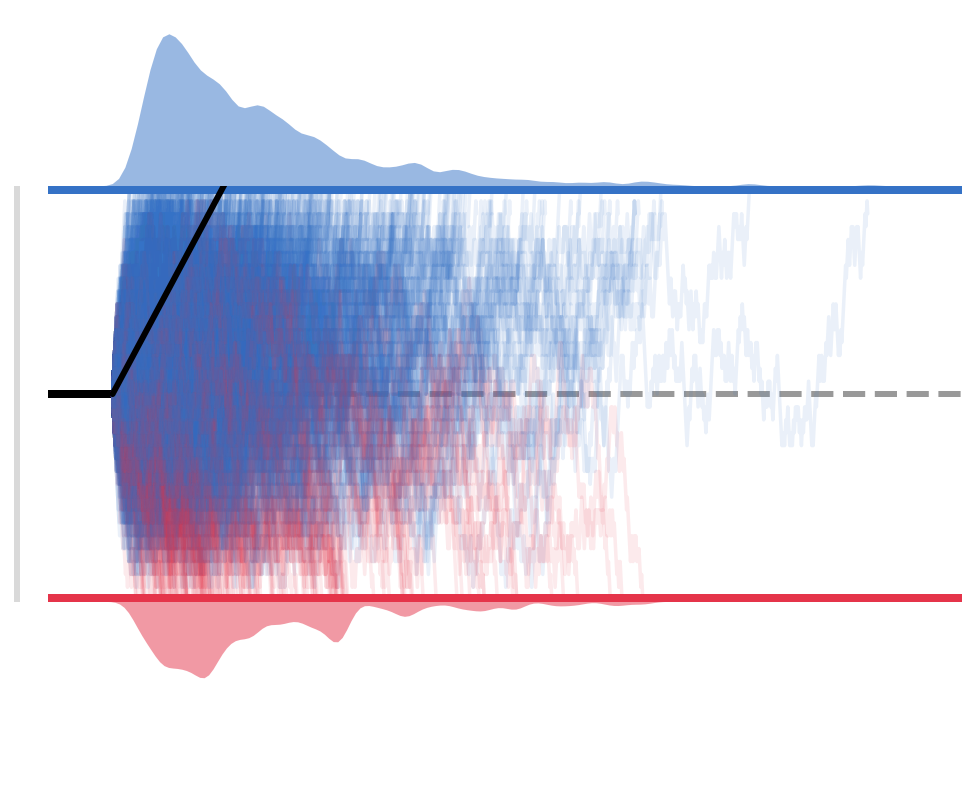

In [99]:
ax = vis.plot_ddm_sims(df, parameters, traces=traces, plot_v=True)

### Use DDM to simulate Yes/No experiment

In [92]:
a = .16 # boundary height
tr = .25 # nondecision time (in seconds)
z = .5 # starting point ([0,1], fraction of a)

vSignal = .18 # drift-rate on signal trials
vNoise = -.1 # drift-rate on noise-only trials

sigParams = np.array([a, tr, vSignal, z, si, dx, dt])
noiseParams = np.array([a, tr, vNoise, z, si, dx, dt])
plist = [sigParams, noiseParams]

In [93]:
sdtData, traces = ddm.ddm_sim_yesno(plist, ntrials, deadline)

In [94]:
sdt.analyze_yesno(sdtData)

Signal Accuracy = 95%
	Hits = 945
	Misses = 45

Noise Accuracy = 83%
	Corr. Rej. = 799
	False Alarms = 163

d-prime (d') = 2.65
criterion (c) = -0.37


## Compare $v_{signal}$ and $v_{noise}$ RTs 

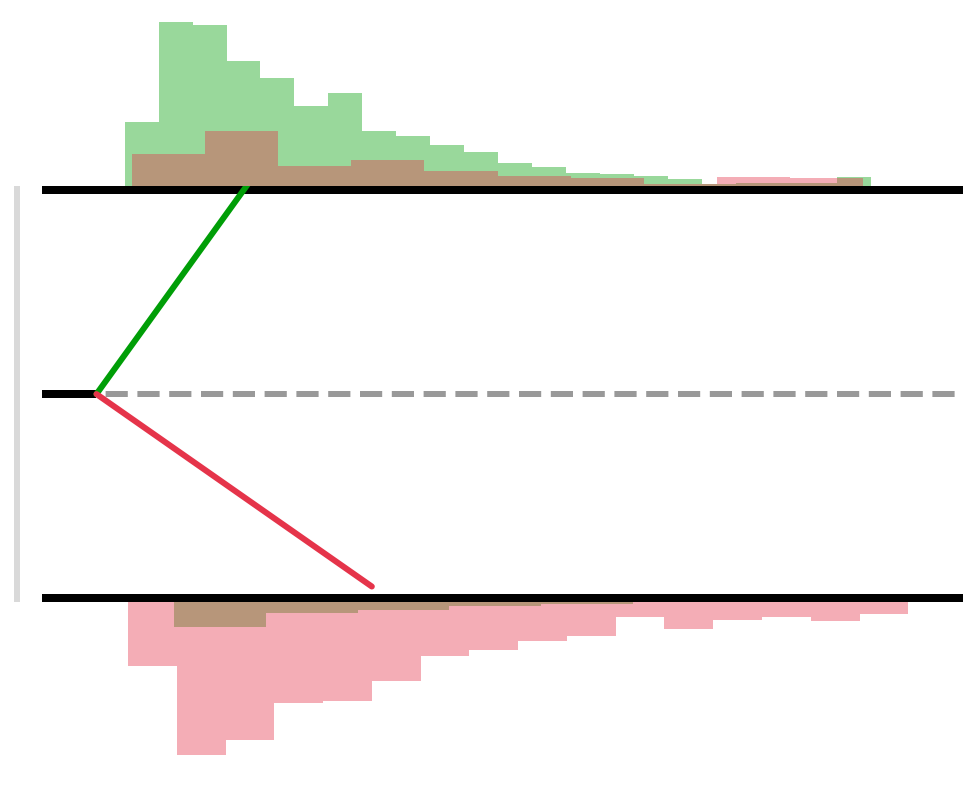

In [95]:
ax = vis.compare_drift_effects(sdtData, plist)